# Scripts to plot agent operation

In [1]:
%matplotlib inline
%pdb

Automatic pdb calling has been turned ON


In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import networkx  as nx
from collections import OrderedDict
import copy
import random

In [3]:
if '../' not in sys.path:
    sys.path.append('../')

In [4]:
import graph_model as gm

In [5]:
# build an example graph
gr = nx.Graph()
gr.add_nodes_from('abcdefg')
gr.add_edges_from([('a', 'b'), ('a', 'c'), ('b', 'c'),
                   ('b', 'd'), ('c', 'e'), ('d', 'e'),
                   ('d', 'f'), ('d', 'g'), ('f', 'g')])

In [6]:
elimination_dict = OrderedDict({
 6 : dict(zip('abcdefg' ,[2.8452072e-01, 3.8740795e-06 ,2.3300267e-06, 1.0000203e-06, 4.1266927e-01,
 1.5140139e-01, 1.5140139e-01])),

 7 :dict(zip('abcdefg' ,[2.3266157e-05, 1.0000996e-06, 1.0000838e-06, 1.0000028e-06, 1.2729141e-05,
 0.0000000e+00, 9.9996096e-01])),

 4 : dict(zip('abcdefg' ,[7.1588063e-01, 2.7046335e-06, 2.7046335e-06, 1.3825430e-01, 1.4585969e-01,
 0.0000000e+00, 0.0000000e+00])),

 1 : dict(zip('abcdefg' ,[4.9999678e-01, 3.2125802e-06, 3.2125802e-06, 0.0000000e+00, 4.9999678e-01,
 0.0000000e+00, 0.0000000e+00])),

 5: dict(zip('abcdefg' ,[0.  ,      0.3333333, 0.3333333, 0. ,       0.3333333, 0. ,0.])),

 2: dict(zip('abcdefg' ,[0.,  0.5 ,0.5 ,0. ,0, 0.,  0. ])),

 3: dict(zip('abcdefg' ,[0., 0., 1., 0., 0., 0., 0.]))
})
index_to_node = dict(zip(range(1, 8), 'abcdefg'))

In [7]:
elimination_dict = OrderedDict({
 5 : dict(zip('abcdefg' ,[2.8452206e-01, 3.8740714e-06, 2.3300329e-06, 1.0000205e-06, 4.1267121e-01,
 1.5139979e-01, 1.5139979e-01])),

 7 :dict(zip('abcdefg' ,[5.4508966e-01, 6.6179996e-06, 6.6179996e-06 ,1.0000665e-06 ,0.0000000e+00,
 2.2744803e-01, 2.2744803e-01])),

 6 : dict(zip('abcdefg' ,[2.3631579e-05, 1.0001110e-06, 1.0001110e-06, 1.0000123e-06, 0.0000000e+00,
 9.9997336e-01, 0.0000000e+00])),

 1 : dict(zip('abcdefg' ,[5.2421480e-01, 2.7193726e-06, 2.7193726e-06, 4.7577974e-01, 0.0000000e+00,
 0.0000000e+00, 0.0000000e+00])),

 3: dict(zip('abcdefg' ,[0.,        0.3333333, 0.3333333, 0.3333333, 0.    ,    0.    ,    0.       ])),

 2: dict(zip('abcdefg' ,[0.,   0.5 ,0, 0.5 ,0. , 0.,  0. ])),

 4: dict(zip('abcdefg' ,[0., 0., 0., 1., 0., 0., 0.]))
})

/Users/roman/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


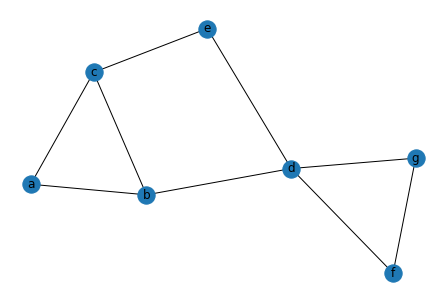

In [8]:
nx.draw(gr, with_labels=True)

In [9]:
# now select a good colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [10]:
half_reds = truncate_colormap(plt.cm.RdPu, 0.0, 1.0)

In [11]:
def plot_policy_step(graph, pos, node_probability, filename='',cmap=plt.cm.Reds, with_colorbar=False):
    """
    Plot 1 step of the policy
    Parameters:
    -----------
    graph: networkx.Graph
        Graph to draw
    pos: dict
        positions of graph nodes, format {node: (x, y)}
    node_probability: dict
        probabilities of nodes to be selected, format {node: w}
    filename: str, default ''
        Filename of the plot
    cmap: matplotlib.colors.Colormap, default plt.cm.Reds
        colormap for probabilities
    with_colorbar: bool, default False
        Should we draw a colorbar
    """
    # create figure
    fig = plt.figure(figsize=(6, 6), frameon=False)
    ax = fig.add_subplot(111)
    # turn off autoscaling
    ax.set_xlim(-1.25, 1.25)
    ax.set_ylim(-1.25, 1.25)
    ax.autoscale(False)
    
    # set node drawing
    node_color = [node_probability[node] for node in graph.nodes()]
    nodes_drawing = nx.draw_networkx_nodes(graph, pos, node_color=node_color, cmap=cmap, node_size=3000,
                                           vmin=0, vmax=1.)
    nodes_drawing.set_edgecolor('k')
    nodes_drawing.set_linewidth(0.5)
    
    # set edge drawing 
    edge_drawing = nx.draw_networkx_edges(graph, pos, width=5)
    
    # set label drawing
    label_drawing = nx.draw_networkx_labels(graph, pos, font_size=35)
    
    # set colorbar drawing
    if with_colorbar:
        cbar_axes = fig.add_axes([0.1, 0.1, 0.03, 0.8])
        cbar_drawing = mpl.colorbar.ColorbarBase(cbar_axes, cmap=cmap, orientation='vertical')
        cbar_axes.yaxis.set_ticks_position('left')
    
    # remove axis drawing
    ax.set_axis_off()
    if len(filename) > 0:
        fig.savefig(filename, transparent=True)

In [12]:
def plot_policy(graph_old, elimination_probs, filename_base='', index_to_node=None):
    """
    Plot a series of graphs corresponding to a policy
    Parameters:
    -----------
    graphs: list of networkx.Graph
        graphs to plot
    elimination_probs: OrderedDict
        dictionary with node probabilities. Those will be used to set the colors of nodes
    filename_base: str, default ''
        base of the figure filename
    index_to_node: dict, default None
        optional mapping from elimination dict keys to graph nodes
    """
    graph = copy.deepcopy(graph_old)
    colormap = truncate_colormap(plt.cm.RdPu, 0.05, 0.85)
    
    # For the very first graph get its layout
    pos = nx.kamada_kawai_layout(graph)
    #pos = nx.spring_layout(graph)
    # Draw first graph with colorbar
    #     plot_policy_step(graph, pos, next(iter(elimination_probs.items()))[1],
    #                      filename=filename_base+'_0.pdf' if len(filename_base) > 0 else '',
    #                      cmap=colormap, with_colorbar=True)
    # Draw all graphs
    for n, (indx, probabilities) in enumerate(elimination_probs.items()):
        if index_to_node:
            node = index_to_node[indx]
        else:
            node = indx
        plot_policy_step(graph, pos, probabilities,
                         filename=filename_base + f'_{n}.pdf' if len(filename_base) > 0 else '',
                         cmap=colormap, with_colorbar=True if n == 0 else False)
        gm.eliminate_node(graph, node)

/Users/roman/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


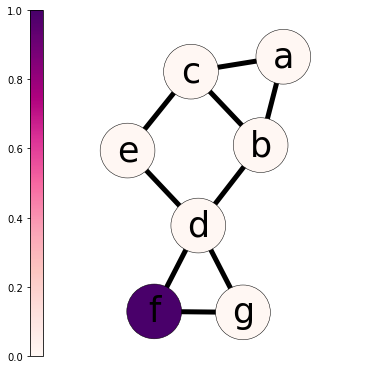

In [13]:
# test drawing functions
graph = gr

# test single step drawing
pos = nx.kamada_kawai_layout(graph)
plot_policy_step(graph, pos, elimination_dict[6], '', half_reds, with_colorbar=True)

/Users/roman/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/roman/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/roman/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/roman/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.i

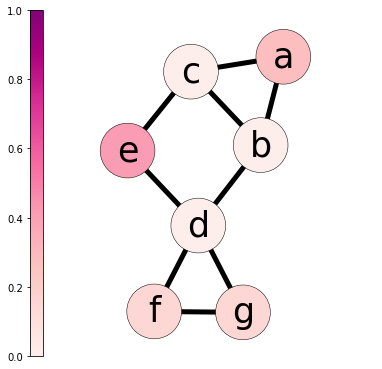

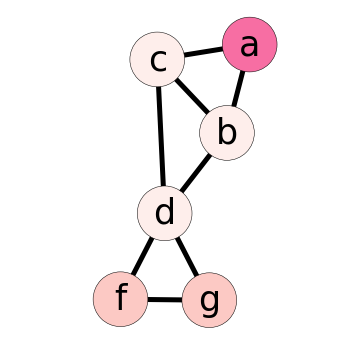

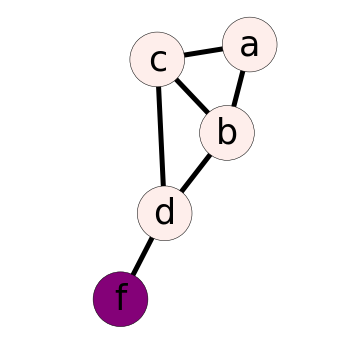

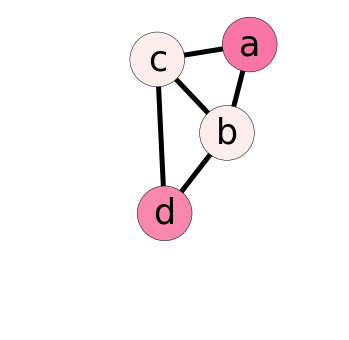

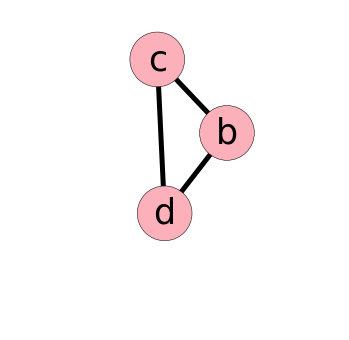

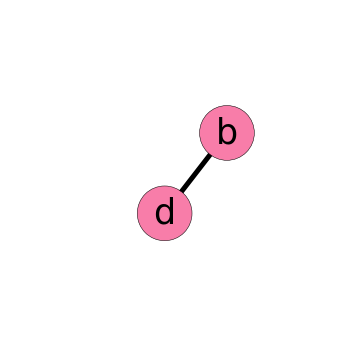

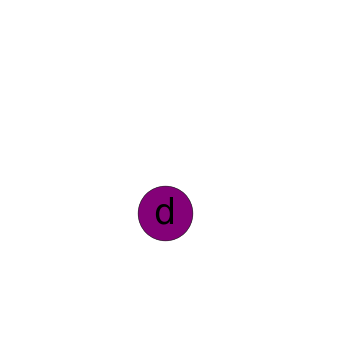

In [14]:
# test all steps drawing
plot_policy(graph, elimination_dict, 'test', index_to_node=index_to_node)